In [1]:
from __future__ import unicode_literals
from hazm import *
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
import pandas as pd
from operator import itemgetter
from math import log

stemmer = Stemmer()
normalizer = Normalizer()
lemmatizer = Lemmatizer()
tokenizer = WordTokenizer()


In [2]:
train_data = pd.read_csv('train.csv', encoding='utf-8')
test_data = pd.read_csv('test.csv')
print(train_data.head())

    label                                            content
0  فناوری  گزارش های منتشر شده حاکی از آن است که کاربران ...
1   ورزشی  سوپر استار سینما و از قهرمانان سابق ووشو ــ کو...
2   حوادث  مدیرعامل شرکت عمران آب کیش از فوت یک نفر در آت...
3  فناوری  یک نوجوان انگلیسی به اتهام هک حساب‌های کاربری ...
4   سلامت  دانشمندان در جدیدترین مطالعات خود اثرات جدید و...


In [3]:
train_data.info()
labels = train_data['label'].unique()
print(labels)
label_count = train_data['label'].value_counts()[0]
label_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    9000 non-null   object
 1   content  9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB
['فناوری' 'ورزشی' 'حوادث' 'سلامت' 'سیاسی' 'فرهنگی/هنری']


1500



PRE-PROCESSING



In [4]:
print(normalizer.normalize('اصلاح نویسه ها و استفاده از نیم فاصله پردازش را آسان می کند'))
print(tokenizer.tokenize('اصلاح نویسه ها و استفاده از نیم فاصله پردازش را آسان می کند'))


اصلاح نویسه‌ها و استفاده از نیم فاصله پردازش را آسان می‌کند
['اصلاح', 'نویسه', 'ها', 'و', 'استفاده', 'از', 'نیم', 'فاصله', 'پردازش', 'را', 'آسان', 'می', 'کند']


In [5]:
print(lemmatizer.lemmatize('شد'))

شد#شو


In [6]:
stop_words = []
stop_words = stopwords_list() + [',', '.', '-', '*', '#', '...', '»', '«',
 '!', '?', '{', '}', '(', ')', '[', ']',
     '$', '&', '،', '؛', ':', '؟', '\n','\r',]
def get_stop_words(flags: list =  [False, True]):
  flag_stem, flag_lem = flags
  with open('stop_words.txt', 'r', encoding="utf-8") as sws:
    inStr = sws.read()
  inStr = normalizer.normalize(inStr)
  stop_words = inStr.split('\n')
  stop_words = list(map(str.strip, stop_words))
  # stop_words = normalizer.normalize(' '.join(stop_words)).split(' ')

  stop_words = list(map(stemmer.stem, stop_words)) if flag_stem else stop_words
  stop_words = list(map(lemmatizer.lemmatize, stop_words)) if flag_lem else stop_words

  stop_words.extend(['\n','\r'])
  print(len(stop_words))
  stop_words = list(set(stop_words))
  print(len(stop_words))
  return stop_words 
stop_words = [] 
stop_words = get_stop_words()
# temp = get_stop_words([True, True])
# for word in stop_words:
#   if word not in temp:
#     print(word)
#     print(stemmer.stem(word))

len(stop_words)
print("شد#شو" in stop_words)


1377
1052
True


In [7]:
s = word_tokenize('ولی برای پردازش، جدا بهتر نیست؟')
print(s)
s = tokenizer.tokenize('ولی برای پردازش، جدا بهتر نیست؟')
print(s)

['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']
['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']


In [8]:
def prepareTxt(inStr, flags: list =  [False, True]):
  flag_stem, flag_lem = flags
  result = normalizer.normalize(inStr)
  result = tokenizer.tokenize(result)
  result = list(map(stemmer.stem, result)) if flag_stem else result
  result = list(map(lemmatizer.lemmatize, result)) if flag_lem else result
  result = list(set(result))
  result = [w for w in result if w not in stop_words]
  return result


In [9]:
d = pd.DataFrame([[1,6.5], [9, 4.5], [4, 5.5]], columns=['a', 'b'])
print(d['a'], '\n', d.index)
# print(d.info())
temp = d.itertuples()
temp = temp.__next__()
print(temp, '\nhooyah\n', type(temp), temp[1], temp.a)
temp = d.iterrows()
temp = temp.__next__()[1]
print(temp, type(temp))
# print(temp.__next__()[1], type(temp))

0    1
1    9
2    4
Name: a, dtype: int64 
 RangeIndex(start=0, stop=3, step=1)
Pandas(Index=0, a=1, b=6.5) 
hooyah
 <class 'pandas.core.frame.Pandas'> 1 1
a    1.0
b    6.5
Name: 0, dtype: float64 <class 'pandas.core.series.Series'>


### ***Phaze 2***


In [10]:
# tech, sport, accidents, health, political, cultur = [dict() * 6]
tables = {label: {} for label in labels}
print(tables)
def cal_tables(df: pd.DataFrame, default: int =0):
  for row in df.itertuples():
    words = prepareTxt(row.content)
    cur_label = row.label
    for word in words:
       tables[cur_label][word] = tables[cur_label].get(word, default) + 1 

cal_tables(train_data)

{'فناوری': {}, 'ورزشی': {}, 'حوادث': {}, 'سلامت': {}, 'سیاسی': {}, 'فرهنگی/هنری': {}}


شرکت


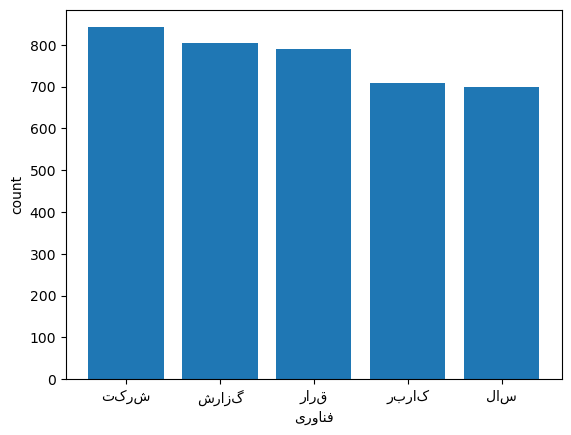

گزارش


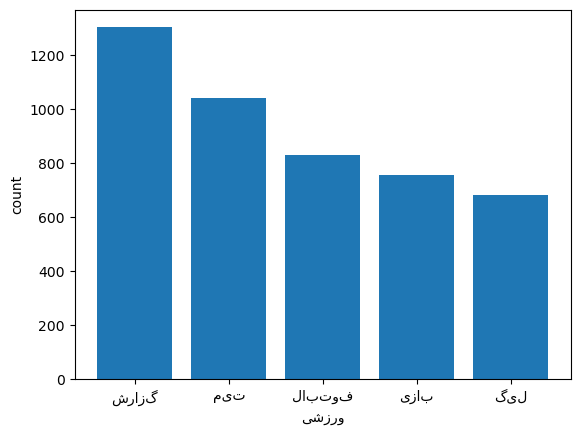

گزارش


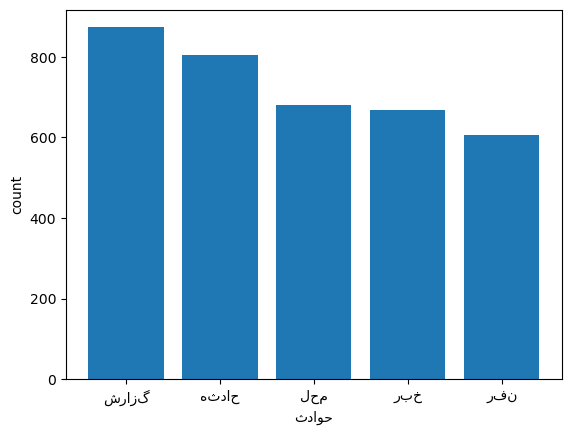

افراد


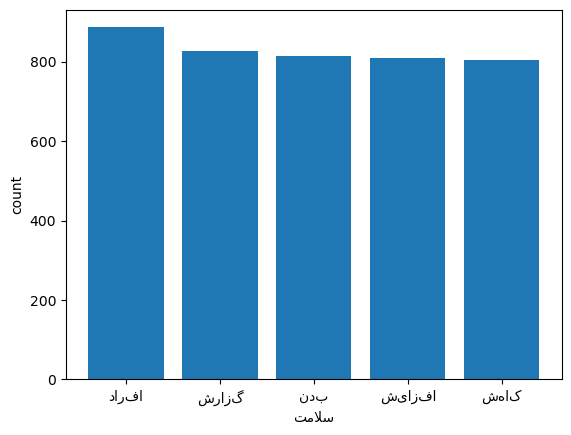

کشور


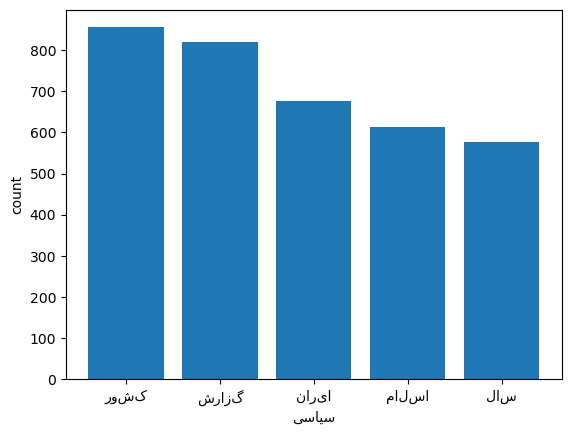

گزارش


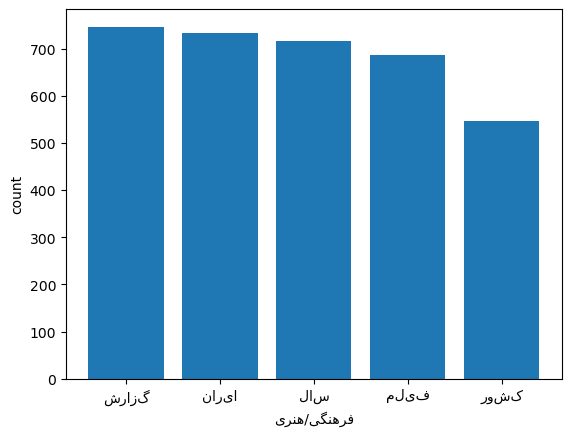

('a', 1)
('b', 2)


In [11]:
def draw_cat_table(cat_title: str, table: dict):
  res = dict(sorted(table.items(), key=itemgetter(1), reverse=True)[:5])
  print(list(res.keys())[0])
  plt.bar(list(map(lambda label: label[::-1],res.keys())), res.values())
  reshaped_text = arabic_reshaper.reshape(cat_title)
  artext = get_display(reshaped_text)
  # plt.xlabel(cat_title[::-1])
  plt.xlabel(artext)
  plt.ylabel('count')
  plt.show()
for cat, table in tables.items():
  draw_cat_table(cat, table)
a = {'a': 1, 'b': 2}
for x in a.items():
  print(x)

### ***Phaze 3***

In [12]:
def cal_table_words_prob(table):
  probs = dict()
  total = sum(table.values())
  for word, count in table.items():
    probs[word] = log(count/total)
  return probs  

prob_tables = {label: {} for label in labels}
for label in labels:
  prob_tables[label] = cal_table_words_prob(tables[label])

def cal_cat_bayes(word: str, table: dict, default: int = 0):
  if default == 0:
    if word not in table:
      return float('-inf')
    return table[word] #log(table[word]/label_count)
  else:
    return log((table.get(word, default)+default)/(label_count+default*len(table)))

def cal_bayes(content: str, default: int = 0):
  probs = {label: 0 for label in labels}
  words = prepareTxt(content)
  for word in words:
    for label in labels:
      table = prob_tables[label] if default == 0 else tables[label]
      probs[label] += cal_cat_bayes(word, table, default)
  return max(probs.items(), key=itemgetter(1))[0]

    



In [24]:
def print_cat_info(label, percision, f1, recall):
  print('\n')
  print("\tcategory:", label)
  print("\tPrecision:", percision)
  print("\tF1:", f1)
  print("\tRecall:", recall)
  print('\n')

def cal(tp, fp, total, correct):
  fWeight = 0
  fAve = 0
  for label in labels:
    precision = tp[label] / (tp[label] + fp[label])
    recall = tp[label] / (total[label])
    f1 = (2*precision*recall)/(precision+recall)
    print_cat_info(label, precision, f1, recall)
    fAve += (f1/6)
    fWeight += (f1 * (total[label]/sum(total.values())))
  print("accuracy: ", correct/sum(total.values()))
  print("macro Ave: ", fAve)
  print("micro Ave: ", correct/sum(total.values()))
  print("weighted Avg: ", fWeight)

tps = {label: 0 for label in labels}
fps = {label: 0 for label in labels}
cat_count = {label: 0 for label in labels}

def naive_bayes(df, default: int = 0):
  for row in df.itertuples():
    predic_label = cal_bayes(row.content, default)
    grnd_true_label = row.label
    cat_count[row.label] += 1
    if predic_label == grnd_true_label:
      tps[row.label] += 1
      global total_correct
      total_correct += 1
    else:
      fps[predic_label] +=1
  
    

In [25]:
total_correct = 0

naive_bayes(test_data)
cal(tps, fps, cat_count, total_correct)
print("\n\n\n-------------------------------------------------")


tps = {label: 0 for label in labels}
fps = {label: 0 for label in labels}
cat_count = {label: 0 for label in labels}
total_correct = 0

naive_bayes(test_data, 1)
cal(tps, fps, cat_count, total_correct)




	category: فناوری
	Precision: 0.18461538461538463
	F1: 0.3116883116883117
	Recall: 1.0




	category: ورزشی
	Precision: 0.9347826086956522
	F1: 0.364406779661017
	Recall: 0.22631578947368422




	category: حوادث
	Precision: 0.8484848484848485
	F1: 0.240343347639485
	Recall: 0.14




	category: سلامت
	Precision: 0.9230769230769231
	F1: 0.23645320197044334
	Recall: 0.13559322033898305




	category: سیاسی
	Precision: 0.8181818181818182
	F1: 0.35294117647058826
	Recall: 0.225




	category: فرهنگی/هنری
	Precision: 0.8666666666666667
	F1: 0.3466666666666666
	Recall: 0.21666666666666667


accuracy:  0.3112107623318386
macro Ave:  0.3087499140160853
micro Ave:  0.3112107623318386
weighted Avg:  0.3089776197937333



-------------------------------------------------


	category: فناوری
	Precision: 0.925
	F1: 0.9024390243902439
	Recall: 0.8809523809523809




	category: ورزشی
	Precision: 0.9782608695652174
	F1: 0.9625668449197862
	Recall: 0.9473684210526315




	category: حوادث
	Precision: 0

In [ ]:
dic = {'a': 1, 'b': 2}
print(max(dic.items(),key=itemgetter(1))[0])
max()